<a href="https://colab.research.google.com/github/EnochYounceSAIC/FiberOptics/blob/main/weekfive/channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
length = 3000
span = 100
sps = 50
OSNR_initial = 33.5 #dB
symbol_rate = 10e9 #10 gigabauds
EDFA_total_power = 15 #dbm
lambda_light = 1540e-9
f_light = 3e8/lambda_light
#fiber data sheet used : https://www.corning.com/media/worldwide/coc/documents/Fiber/product-information-sheets/PI-1470-AEN.pdf
dispersion = 18 #ps/nm/km
distance = np.arange(0,length,1)
EDFA_noise = 4.7
discrete_losses = np.zeros(length)
measured_nm =[1517, 1517.1683, 1517.5523, 1517.5523, 1517.9365, 1518.3209, 1518.7055, 1519.0902, 1519.4752, 1519.8604, 1520.2547, 1520.6313, 1521.017, 1521.403, 1521.7891, 1522.1755, 1522.562, 1522.9487, 1523.3357, 1523.7228, 1524.1101, 1524.4976, 1524.8853, 1525.2733, 1525.6614, 1526.0497, 1526.4382, 1526.8269, 1527.2158, 1527.6049, 1527.9942, 1528.3837, 1528.7734, 1529.1633, 1529.5534, 1529.9436, 1530.3341, 1530.7248, 1531.1157, 1531.5068, 1531.8981, 1532.2896, 1532.6813, 1533.0732, 1533.4653, 1533.8575, 1534.25, 1534.6427, 1535.0356, 1535.4287, 1535.822, 1536.2155, 1536.6092, 1537.003, 1537.3972, 1537.7915, 1538.186, 1538.5807, 1538.9757, 1539.3708, 1539.7661, 1540.1616, 1540.5573, 1540.9533, 1541.3494, 1541.7457, 1542.1423, 1542.539, 1542.936, 1543.333, 1543.73, 1544.128, 1544.5258, 1544.9238, 1545.3219, 1545.720, 1546.1189, 1546.5177, 1546.9167, 1547.3159, 1547.7153, 1548.1149, 1548.5148, 1548.9148, 1549.315, 1549.7155, 1550.116, 1550.517, 1550.918, 1551.319, 1551.720, 1552.1225, 1552.520, 1552.926, 1553.328, 1553.730, 1554.134, 1554.537, 1554.940, 1555.340, 1555.747, 1556.150, 1556.550, 1556.960, 1557.360, 1557.768, 1557.768, 1558.170, 1558.5779, 1558.9831, 1559.388, 1559.794, 1560.200, 1560.600, 1561.012, 1561.420, 1561.826, 1562.232, 1562.6399, 1563.047, 1563.047, 1563.4548, 1563.8626, 1564.270, 1564.678, 1565.087, 1565.4959, 1565.9047, 1566.3138, 1566.720, 1567.130, 1567.540, 1567.950, 1568.360, 1568.360, 1568.770, 1569.180, 1569.594, 1570.000, 1570.416, 1570.830, 1571.239, 1571.650, 1572.060, 1572.475, 1572.888, 1573.300, 1573.710, 1574.127, 1574.540, 1574.950, 1575.367, 1575.780, 1576.196, 1576.610, 1577.030, 1577.440, 1577.850, 1578.270, 1578.686, 1579.102, 1579.520, 1579.940, 1580.350, 1581]
measured_db =[0, 8.43, 8.58, 8.76, 8.96, 9.19, 9.44, 9.71, 10, 10.31, 10.64, 10.98, 11.34, 11.71, 12.1, 12.5, 12.91, 13.33, 13.75, 14.19, 14.64, 15.09, 15.54, 16, 16.46, 16.92, 17.38, 17.85, 18.31, 18.76, 19.22, 19.67, 20.11, 20.54, 20.97, 21.41, 21.82, 22.17, 22.45, 22.65, 22.77, 22.8, 22.72, 22.55, 22.29, 21.96, 21.57, 21.13, 20.67, 20.21, 19.78, 19.39, 19.06, 18.8, 18.6, 18.46, 18.38, 18.36, 18.39, 18.46, 18.56, 18.7, 18.85, 19.03, 19.23, 19.43, 19.63, 19.8, 20, 20.2, 20.37, 20.53, 20.67, 20.8, 20.9, 21, 21.12, 21.21, 21.29, 21.36, 21.43, 21.48, 21.52, 21.55, 21.58, 21.59, 21.6, 21.6, 21.59, 21.58, 21.57, 21.55, 21.54, 21.52, 21.5, 21.5, 21.5, 21.4, 21.4, 21.4, 21.36, 21.3, 21.3, 21.25, 21.2, 21.2, 21.14, 21.07, 21, 20.89, 20.8, 20.68, 20.56, 20.44, 20.32, 20.2, 20.06, 19.93, 19.79, 19.79, 19.65, 19.5, 19.34, 19.18, 19, 18.84, 18.66, 18.47, 18.28, 18, 17.88, 17.67, 17.46, 17.46, 17.24, 17, 16.78, 16.55, 16.3, 16, 15.8, 15.54, 15.27, 15, 14.72, 14.4, 14.14, 13.85, 13.54, 13.24, 12.9, 12.6, 12.28, 11.94, 11.6, 11.26, 10.9, 10.56, 10.2, 9.83, 9.45, 9.07, 8.68, 0]
smf28 = {'attenuation_per_km': 0.18, 'dispersion': 18, 'dispersion_slope' :0.092,'attenuation_slope_quadratic' : 2.5e-4} # Adjusted value
leaf = {'attenuation_per_km': 0.22, 'dispersion': -4, 'dispersion_slope' : -0.12,'attenuation_slope_quadratic' : 2.5e-4} # Adjusted value
cable_types = {'smf28': smf28, 'leaf': leaf}
span_layout = [('smf28', 33), ('leaf', 67)]
discrete_losses = np.zeros(length)

# Initialize channeled_lambdas
channels = 70 # Ensure 'channels' is defined before using it here
channeled_lambdas = np.zeros(channels)
for i in range(channels):
  channeled_lambdas[i] = lambda_light + i*0.4e-9

# Modified attenuate function to use wavelength-dependent attenuation
def attenuate(signal, noise, location, fiber_params, lambda_signal_nm, lambda_ref_nm=1550):
    """
    Applies wavelength-dependent attenuation to signal and noise power (in mW) for a single channel over 1 km.
    Assumes signal and noise are arrays representing power at different locations.
    """
    if location + 1 < len(signal):
        # Calculate wavelength-dependent attenuation for the current fiber segment and signal wavelength
        attenuation_per_km_dB = calculate_wavelength_dependent_attenuation(
            fiber_params, lambda_signal_nm, lambda_ref_nm
        )

        # Apply attenuation to signal and noise for the current kilometer
        # Ensure we are working with dBm here for subtraction
        signal[location + 1] = signal[location] - attenuation_per_km_dB
        noise[location + 1] = noise[location] - attenuation_per_km_dB


# The const_gain_EDFA function remains as is, as the focus was on const_power_EDFA
def const_gain_EDFA(signal, noise, const_gain,wavelength, EDFA_noise,location):
  #Takes signal power(mW) and noise(mW), assumed to be vectors with length equal to total distance, const_gain is the amplification gain(dB), wavelength of the light, EDFA noise figure, and the location along the fiber
  #Returns the signal and noise arrays to save the data
  #Adds ASE noise and amplifies by given gain
  EDFA_noise_linear = 10**(EDFA_noise/10)
  planks_const = 6.626e-34 #J*s
  bandwidth_nm = 0.1e-9 #0.1nm
  f_light = 3e8/wavelength
  bandwidth_freq = bandwidth_nm * (f_light / wavelength)
  power_ase_per_amp = planks_const * f_light * EDFA_noise_linear * (10**(const_gain/10) - 1) * bandwidth_freq *1000# (mW)
  noise[location] += power_ase_per_amp
  signal[location] *= 10**(const_gain/10)
  noise[location] *= 10**(const_gain/10)
  # return signal, noise # Returning the arrays

#chomatic disperson
def chrom_dispersion_total(positive_amount,negative_amount,lambda_signal, Is_Compensated, length,span):
  distance = np.arange(0,length,1)
  dispersion = np.zeros(len(distance))
  pos_dispersion = positive_amount*lambda_signal*1e9
  neg_dispersion = negative_amount*lambda_signal*1e9
  if(Is_Compensated):
    accumulated_dispersion = 0
    current_slope = pos_dispersion # Start with the positive slope
    for i in range(1, length):
        # Check if we are at a span boundary
        if i % span == 0:
            # Swap the slope between positive_amount and negative_amount
            if current_slope == pos_dispersion:
                current_slope = neg_dispersion
            else:
                current_slope = pos_dispersion
        accumulated_dispersion += current_slope # Add dispersion based on the current slope
        dispersion[i] = accumulated_dispersion

  else:
    dispersion = distance*positive_amount # Only positive dispersion if not compensated

  return dispersion


import numpy as np
from scipy.interpolate import interp1d

# Assuming EDFA_total_power, EDFA_noise, channeled_lambdas, gain_weights are defined elsewhere
# Assuming c and bandwidth_nm are defined elsewhere
# Assuming power_floor_mW is defined globally
# Assuming measured_nm and measured_db are defined globally


# --- EDFA Function with Simplified Gain Saturation (Revised - Attempt 18 - Debug Noise Addition and Gain Application) ---
def const_power_EDFA_with_tilt_saturation(multi_channel_signal_power, multi_channel_noise, const_power_dBm, channeled_lambdas, EDFA_noise, location, gain_weights):
    # In db :const_power_dBm, EDFA_noise, gain_tilt_dB
    # In mW:  both multi channel inputs
    EDFA_noise_linear = 10**(EDFA_noise/10)
    planks_const = 6.626e-34 #J*s
    c = 3e8 # Speed of light
    epsilon = 1e-20 # Small value for numerical stability
    saturation_output_power_dBm = const_power_dBm - 0 # Example saturation level
    saturation_output_power_mW = 10**(saturation_output_power_dBm / 10)

    # Get input power for current location in mW
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()
    total_input_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW
    total_input_power_mW_sum = np.sum(total_input_power_mW_per_channel)
    target_total_power_mW = 10**(const_power_dBm/10)

    # Ensure total input power is not zero or negative
    total_input_power_mW_sum = np.maximum(total_input_power_mW_sum, epsilon)

    # Calculate the target gain profile in linear based on the spectral tilt (gain_weights in dB)
    gain_tilt_linear = 10**(gain_weights / 10)

    actual_total_output_power_mW_target = min(target_total_power_mW, saturation_output_power_mW) # Output power is target or saturation limit
    # --- End Simplified Gain Saturation ---

    # Calculate the linear gain required for each channel to achieve the desired output power profile.
    # The desired output power per channel is proportional to the total target power and the gain tilt.
    desired_output_power_per_channel_linear = gain_tilt_linear * (actual_total_output_power_mW_target / (np.sum(gain_tilt_linear) + epsilon))

    # Calculate the gain applied to bring the *total* input power of each channel to the desired output level.
    gain_applied_linear_per_channel = desired_output_power_per_channel_linear / (total_input_power_mW_per_channel + epsilon)

    # Apply the calculated linear gains to signal and noise separately
    multi_channel_signal_power[:, location] = current_signal_input_mW * gain_applied_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * gain_applied_linear_per_channel

    # Add ASE noise *after* amplification.
    # Power_ase_per_amp = n_sp * h * nu * (Gain - 1) * Bandwidth_freq
    # n_sp = NF_linear / 2
    # Gain is the linear signal gain applied by the EDFA for each channel.

    n_sp_linear = 10**(EDFA_noise/10) / 2
    f_channeled = c / channeled_lambdas
    bandwidth_nm = 0.1e-9 # 0.1 nm
    channeled_lambdas_m = channeled_lambdas # Ensure wavelengths are in meters for frequency calculation

    # Bandwidth in frequency (Hz) corresponding to 0.1 nm bandwidth at each channel's wavelength
    bandwidth_freq_per_channel = c * bandwidth_nm / (channeled_lambdas_m**2)

    # We need the *signal* gain for each channel to calculate ASE noise accurately.
    # The 'gain_applied_linear_per_channel' is based on the *total* power (signal + noise).
    # In a constant power EDFA with power loading, the signal gain can vary across channels
    # and might be different from the total power gain, especially if noise power is significant.

    # A more accurate approach would be to calculate the signal gain separately:
    # signal_gain_linear_per_channel = multi_channel_signal_power[:, location] / current_signal_input_mW
    # However, `multi_channel_signal_power[:, location]` already has the gain applied.

    # Let's assume, as a reasonable approximation in many cases, that the signal gain is close to the gain applied to the total power, especially if signal power is dominant.
    # Or, alternatively, consider the gain needed to overcome the span loss as the signal gain for ASE calculation.
    # Let's use the gain needed to compensate for the span loss for each channel for the ASE calculation, as it's a key function of a line amplifier.

    # We need the span attenuation in dB for each channel. This is calculated in the main loop (cell pX-SsmhtdcU).
    # Let's assume `span_attenuation_dB_per_channel` is accessible here.
    gain_span_linear_per_channel = 10**(span_attenuation_dB_per_channel / 10)

    # Calculate ASE noise power added per channel in mW.
    # Using P_ASE = n_sp * h * nu * (Gain - 1) * Bandwidth_freq, where Gain is the signal gain (approximated by span compensation gain).
    power_ase_added_mW_per_channel = n_sp_linear * planks_const * f_channeled * bandwidth_freq_per_channel * (gain_span_linear_per_channel - 1) * 1000
    power_ase_added_mW_per_channel[power_ase_added_mW_per_channel < 0] = 0 # Ensure non-negative ASE noise

    multi_channel_noise[:, location] += power_ase_added_mW_per_channel

    # The gain equalization is applied *after* the EDFA in the main simulation loop (cell pX-SsmhtdcU).
    # There is no need for a final scaling safeguard here within the EDFA function based on the total target power after the EDFA.
    # The GE will handle setting the final total power level and flattening the spectrum after the EDFA output.


# Function for pre-emphasis calculation
def calculate_preemphasis_powers(channels, edfa_gain_weights_db, target_total_initial_power_dBm):
    """
    Calculates initial channel powers with pre-emphasis based on inverse EDFA gain weights.

    Args:
        channels (int): Number of channels.
        edfa_gain_weights_db (np.ndarray): EDFA gain weights in dB.
        target_total_initial_power_dBm (float): Target total initial power in dBm.

    Returns:
        np.ndarray: Initial channel powers in dBm.
    """
    # Calculate target total initial power in mW
    target_total_initial_power_mW = 10**(target_total_initial_power_dBm / 10)

    # Calculate initial power shape based on the inverse of EDFA gain weights (in linear)
    # We want initial_power * EDFA_gain_linear to be constant across channels
    # EDFA_gain_linear is proportional to 10**(edfa_gain_weights_db / 10)
    # So, initial_power should be proportional to 1 / (10**(edfa_gain_weights_db / 10)) = 10**(-edfa_gain_weights_db / 10)
    initial_power_shape_linear = 10**(-edfa_gain_weights_db / 10)

    # Normalize the initial power shape so that the total power equals the target total initial power
    normalized_initial_power_mW = (initial_power_shape_linear / np.sum(initial_power_shape_linear)) * target_total_initial_power_mW

    # Convert initial powers to dBm
    channel_power_dbm = 10*np.log10(normalized_initial_power_mW)
    return channel_power_dbm



def calculate_wavelength_dependent_attenuation(cable_type_params, lambda_signal_nm_input, lambda_min_attenuation_nm_input=1550):
    """
    Calculates the attenuation per kilometer at a given signal wavelength using a quadratic model.

    Args:
        cable_type_params (dict): Dictionary containing 'attenuation_per_km' (at min attenuation wavelength)
                                  and 'attenuation_slope_quadratic' for the cable type.
        lambda_signal_nm_input (float): The signal wavelength in nanometers.
        lambda_min_attenuation_nm_input (float): The wavelength of minimum attenuation in nanometers (default is 1550 nm).

    Returns:
        float: The attenuation at the signal wavelength in dB/km.
    """
    alpha_min = cable_type_params.get('attenuation_per_km', 0) # Base attenuation at minimum wavelength
    beta_quadratic = cable_type_params.get('attenuation_slope_quadratic', 0) # Quadratic slope parameter
    # Explicitly assign input wavelengths to local variables for clarity
    signal_wavelength_nm = lambda_signal_nm_input
    min_attenuation_wavelength_nm = lambda_min_attenuation_nm_input

    # Quadratic model for attenuation: alpha(lambda) = alpha_min + beta * (lambda - lambda_min)^2
    wavelength_difference_nm = signal_wavelength_nm - min_attenuation_wavelength_nm
    # Ensure attenuation is positive (loss)
    attenuation_at_lambda = alpha_min + beta_quadratic * ((wavelength_difference_nm)**2)
    return attenuation_at_lambda if attenuation_at_lambda > 0 else 0


def calculate_dispersion_at_wavelength(cable_type_params, lambda_signal_nm, lambda_ref_nm=1550):

    D_ref = cable_type_params.get('dispersion', 0)
    S_ref = cable_type_params.get('dispersion_slope', 0)
    # Correcting the unit of lambda_ref_nm in the calculation
    dispersion_at_lambda = D_ref + S_ref * (lambda_signal_nm - lambda_ref_nm*1e9)
    return dispersion_at_lambda

def chrom_dispersion_total_with_slope(length, span_layout, cable_types, channeled_lambdas_nm, lambda_ref_nm=1550):
    num_channels = len(channeled_lambdas_nm)
    accumulated_dispersion = np.zeros((num_channels, length + 1)) # Store accumulated dispersion per km
    total_span_length = sum(length for _, length in span_layout)

    # Pre-calculate which cable type is used for each kilometer within a span
    span_fiber_types = []
    for cable_type_name, segment_length in span_layout:
        span_fiber_types.extend([cable_type_name] * segment_length)

    for i in range(length): # Loop through each kilometer (from 0 to length-1)
        km_in_current_span = i % total_span_length

        # Determine the cable type for the current kilometer using the pre-calculated list
        current_cable_type_name = span_fiber_types[km_in_current_span]
        current_cable_type_params = cable_types[current_cable_type_name]


        # Calculate incremental dispersion for each channel at this kilometer
        for j in range(num_channels):
            dispersion_per_km_at_lambda = calculate_dispersion_at_wavelength(
                current_cable_type_params, channeled_lambdas_nm[j], lambda_ref_nm
            )
            # Accumulate the dispersion - Using a temporary variable for clarity and to potentially avoid subtle indexing issues
            current_accumulated_value = accumulated_dispersion[j, i]
            new_accumulated_value = current_accumulated_value + dispersion_per_km_at_lambda
            accumulated_dispersion[j, i+1] = new_accumulated_value


    return accumulated_dispersion

# --- Attenuation Function (Included here for self-containment, or ensure it's run in a preceding cell) ---
def apply_attenuation(power_mW, attenuation_per_km_dB, length_km):
    """Applies attenuation to power (in mW) over a given length of fiber."""
    attenuation_linear = 10**(-attenuation_per_km_dB / 10)
    power_after_attenuation_mW = power_mW * (attenuation_linear ** length_km)
    return power_after_attenuation_mW
# --- End Attenuation Function ---
def apply_gain_equalizer(multi_channel_signal_power, multi_channel_noise, target_total_power_dBm, location):
    """Applies a gain equalizer to flatten the total power spectrum to a target level per channel."""
    epsilon = 1e-20  # Small value for numerical stability

    # 1. Access power at the specified location (after EDFA):
    current_signal_input_mW = multi_channel_signal_power[:, location].copy()
    current_noise_input_mW = multi_channel_noise[:, location].copy()
    current_total_power_mW_per_channel = current_signal_input_mW + current_noise_input_mW

    # Calculate the total target power in mW
    target_total_power_mW = 10**(target_total_power_dBm / 10)

    # Calculate the target power per channel (assuming equal power distribution after equalization)
    target_power_per_channel_mW = target_total_power_mW / len(current_total_power_mW_per_channel)

    # 2. Calculate the required linear gain for each channel to reach the target power per channel
    # Avoid division by zero or near-zero input power
    gain_needed_linear_per_channel = np.zeros_like(current_total_power_mW_per_channel)
    non_zero_power_mask = current_total_power_mW_per_channel > epsilon
    gain_needed_linear_per_channel[non_zero_power_mask] = target_power_per_channel_mW / (current_total_power_mW_per_channel[non_zero_power_mask] + epsilon)

    # Apply the calculated linear gains to both the signal and noise power at the current location
    multi_channel_signal_power[:, location] = current_signal_input_mW * gain_needed_linear_per_channel
    multi_channel_noise[:, location] = current_noise_input_mW * gain_needed_linear_per_channel

    # Note: This simplified model assumes the GE itself does not add noise.

##chrom dispersion

In [2]:
channels = 70
signal_length = 5000
# channeled_lambdas is moved to cell pX-SsmBhtdcU
signals = np.zeros((channels, signal_length), dtype=complex)
span_attenuation_dB_per_channel = np.zeros(channels)
total_span_length = sum(length for _, length in span_layout)
current_span_length_counter = 0

span_fiber_types = []
for cable_type_name, segment_length in span_layout:
    span_fiber_types.extend([cable_type_name] * segment_length)


for km in range(total_span_length):
    current_cable_type_name = span_fiber_types[km]
    current_cable_type_params = cable_types[current_cable_type_name]
    for j in range(channels):
         span_attenuation_dB_per_channel[j] += calculate_wavelength_dependent_attenuation(
            current_cable_type_params, channeled_lambdas[j]*1e9, 1550
        )

# Use the inverse of the span attenuation profile as EDFA gain weights (in dB)
# We normalize the weights so the average is 0 dB, and the tilt compensates for loss
average_span_attenuation_dB = np.mean(span_attenuation_dB_per_channel)
edfa_gain_weights_db = span_attenuation_dB_per_channel - average_span_attenuation_dB


# Calculate initial channel powers using the pre-emphasis function
target_total_initial_power_dBm = 15 # Define target total initial power
channel_power = calculate_preemphasis_powers(channels, edfa_gain_weights_db, target_total_initial_power_dBm)



Total accumulated dispersion after 3000 km (ps/nm):


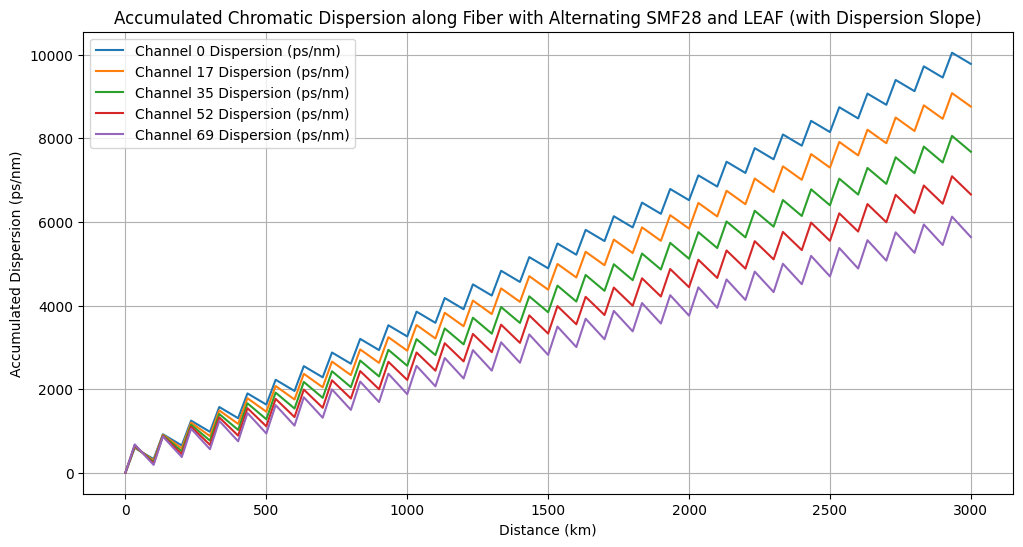

In [3]:
# Example usage with the new chrom_dispersion_total_with_slope function

smf28_params = smf28 # Using the smf28 dictionary from the first cell
leaf_params = leaf   # Using the leaf dictionary from the first cell



channeled_lambdas_nm = channeled_lambdas * 1e9

# Calculate the accumulated chromatic dispersion using the new function
accumulated_dispersion_with_slope = chrom_dispersion_total_with_slope(
    length, span_layout, cable_types, channeled_lambdas_nm, lambda_light
)

# Example: Print accumulated dispersion at the end for each channel
print("Total accumulated dispersion after", length, "km (ps/nm):")
# print(accumulated_dispersion_with_slope[:, -1]) # Print final accumulated dispersion for each channel


# Plot accumulated dispersion for a few representative channels
plt.figure(figsize=(12, 6))
channels_to_plot = [0, channels // 4, channels // 2, channels * 3 // 4, channels - 1] # Plot a few channels
distance_km = np.arange(0, length + 1, 1)

for channel_index in channels_to_plot:
    plt.plot(distance_km, accumulated_dispersion_with_slope[channel_index, :], label=f'Channel {channel_index} Dispersion (ps/nm)')


plt.xlabel("Distance (km)")


plt.ylabel("Accumulated Dispersion (ps/nm)")
plt.title("Accumulated Chromatic Dispersion along Fiber with Alternating SMF28 and LEAF (with Dispersion Slope)")
plt.legend()
plt.grid(True)
plt.show()

##Attenuation

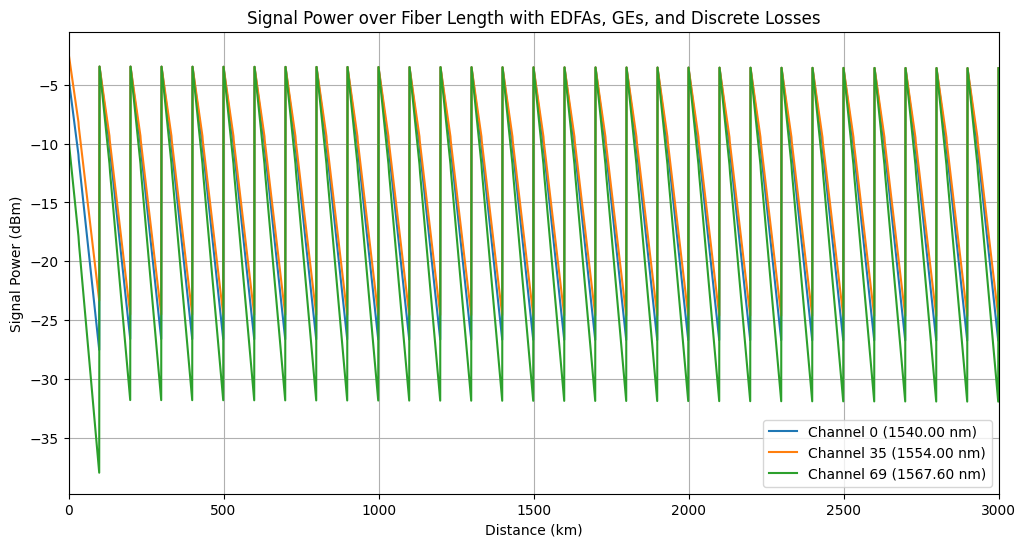

In [4]:
# prompt: show me how these new channels will attenuate over time, with EDFAS and GEs ove the 3000km span. make a plot to display 3 channles, 0, 35,69, and how they change over time

import matplotlib.pyplot as plt
import numpy as np
# Initialize power arrays (in dBm)
multi_channel_signal_power_dBm = np.zeros((channels, length + 1))
multi_channel_noise_power_dBm = np.zeros((channels, length + 1)) # Initialize noise power array


# Set the initial signal power at the beginning of the fiber (location 0)
multi_channel_signal_power_dBm[:, 0] = channel_power

# Calculate and set the initial noise power based on the initial signal power and OSNR_initial
# OSNR_initial (dB) = Signal Power (dBm) - Noise Power (dBm)
# Noise Power (dBm) = Signal Power (dBm) - OSNR_initial (dB)
multi_channel_noise_power_dBm[:, 0] = multi_channel_signal_power_dBm[:, 0] - OSNR_initial


# Initialize power arrays in mW. These will be updated by the EDFA and GE functions.
# The size is length + 1 to include the starting power at location 0 and the power after each kilometer up to 'length'.
multi_channel_signal_power_mW = 10**(multi_channel_signal_power_dBm / 10)
multi_channel_noise_power_mW = 10**(multi_channel_noise_power_dBm / 10)


total_span_length = sum(length for _, length in span_layout)

# Calculate the attenuation profile over a single span to use for EDFA gain weights
# This calculation was moved to a preceding cell (a5eb3680) but is needed here for scope
span_attenuation_dB_per_channel = np.zeros(channels)
current_span_length_counter = 0
span_fiber_types = []
for cable_type_name, segment_length in span_layout:
    span_fiber_types.extend([cable_type_name] * segment_length)

for km in range(total_span_length):
    current_cable_type_name = span_fiber_types[km]
    current_cable_type_params = cable_types[current_cable_type_name]
    for j in range(channels):
         span_attenuation_dB_per_channel[j] += calculate_wavelength_dependent_attenuation(
            current_cable_type_params, channeled_lambdas[j]*1e9, 1550
        )

# Use the inverse of the span attenuation profile as EDFA gain weights (in dB)
# We normalize the weights so the average is 0 dB, and the tilt compensates for loss
average_span_attenuation_dB = np.mean(span_attenuation_dB_per_channel)
edfa_gain_weights_db = span_attenuation_dB_per_channel - average_span_attenuation_dB


# Pre-calculate which cable type is used for each kilometer within a span
# This was already done above, can remove duplicate
# span_fiber_types = []
# for cable_type_name, segment_length in span_layout:
#     span_fiber_types.extend([cable_type_name] * segment_length)

# Use the pre-existing discrete_losses array initialized in cell Aiwza1t_tW3J
# Ensure its size is sufficient for length + 1 locations and reset it to zeros
if len(discrete_losses) < length + 1:
    # If the existing array is too small, re-initialize it with the correct size
    discrete_losses = np.zeros(length + 1)
else:
    # If the existing array is large enough, reset its values to zero
    discrete_losses.fill(0)

discrete_loss_per_event_dB = 0.2 # Define the discrete loss value in dB


# Simulate propagation over distance
for i in range(length): # Loop through each kilometer (from 0 to length-1)
    km_in_current_span = i % total_span_length

    # Determine the cable type for the current kilometer
    current_cable_type_name = span_fiber_types[km_in_current_span]
    current_cable_type_params = cable_types[current_cable_type_name]

    # Determine the cable type for the next kilometer (if it exists) to check for changes
    next_km_in_span = (i + 1) % total_span_length
    if i + 1 < length:
        next_cable_type_name = span_fiber_types[next_km_in_span]
    else:
        next_cable_type_name = current_cable_type_name # No change at the very end

    # Apply attenuation for this kilometer
    for j in range(channels):
        attenuation_per_km_dB = calculate_wavelength_dependent_attenuation(
            current_cable_type_params, channeled_lambdas[j]*1e9, 1550
        )

        # Apply attenuation to signal and noise in dBm for the next location
        multi_channel_signal_power_dBm[j, i+1] = multi_channel_signal_power_dBm[j, i] - attenuation_per_km_dB
        multi_channel_noise_power_dBm[j, i+1] = multi_channel_noise_power_dBm[j, i] - attenuation_per_km_dB


    # Check for fiber type change at the end of the current kilometer (start of the next)
    # Also ensure it's not an EDFA location
    if next_cable_type_name != current_cable_type_name and (i + 1) % span != 0:
        # Store the discrete loss at the beginning of the next kilometer (location i+1)
        discrete_losses[i+1] = discrete_loss_per_event_dB
        # print(f"Fiber type change at km {i+1}: from {current_cable_type_name} to {next_cable_type_name}. Applying {discrete_losses[i+1]} dB loss.") # Debug print
        # Apply discrete loss at the beginning of the next kilometer (location i+1)
        multi_channel_signal_power_dBm[:, i+1] -= discrete_losses[i+1]
        multi_channel_noise_power_dBm[:, i+1] -= discrete_losses[i+1]


    # Also update the mW arrays after attenuation and discrete losses for consistency before EDFA/GE
    multi_channel_signal_power_mW[:, i+1] = 10**(multi_channel_signal_power_dBm[:, i+1] / 10)
    multi_channel_noise_power_mW[:, i+1] = 10**(multi_channel_noise_power_dBm[:, i+1] / 10)


    # Apply EDFA at the end of each span
    if (i + 1) % span == 0:
        span_num = (i + 1) // span
        location = i + 1 # EDFA/GE location is at the end of the span (i.e., km i+1)

        # The EDFA and GE functions are designed to modify the mW arrays in place at the specified location.
        # We pass the full mW arrays and the location index.

        # Apply EDFA with tilt and saturation
        const_power_EDFA_with_tilt_saturation(
            multi_channel_signal_power_mW,
            multi_channel_noise_power_mW,
            EDFA_total_power,
            channeled_lambdas,
            EDFA_noise,
            location,
            edfa_gain_weights_db # Use the calculated gain weights based on span attenuation
        )

        # Apply Gain Equalizer after EDFA at span boundaries
        apply_gain_equalizer(multi_channel_signal_power_mW, multi_channel_noise_power_mW, EDFA_total_power, location)

        # After EDFA and GE, update the dBm arrays based on the modified mW values at this location
        # Add a small epsilon to prevent log10(0) if power goes to exactly zero
        multi_channel_signal_power_dBm[:, location] = 10*np.log10(multi_channel_signal_power_mW[:, location] + 1e-18)
        multi_channel_noise_power_dBm[:, location] = 10*np.log10(multi_channel_noise_power_mW[:, location] + 1e-18)


# Select channels to plot
channels_to_plot = [0, 35, 69]
wavelengths_to_plot_nm = [channeled_lambdas[i]*1e9 for i in channels_to_plot]

# Create the plot
plt.figure(figsize=(12, 6))

for idx, channel_index in enumerate(channels_to_plot):
    plt.plot(
        np.arange(length + 1),
        multi_channel_signal_power_dBm[channel_index, :],
        label=f'Channel {channel_index} ({wavelengths_to_plot_nm[idx]:.2f} nm)'
    )

plt.title('Signal Power over Fiber Length with EDFAs, GEs, and Discrete Losses')
plt.xlabel('Distance (km)')
plt.ylabel('Signal Power (dBm)')
plt.xlim(0,length) # Set x-axis limit to the total length
plt.grid(True)
plt.legend()
plt.show()

## OSNR per channel

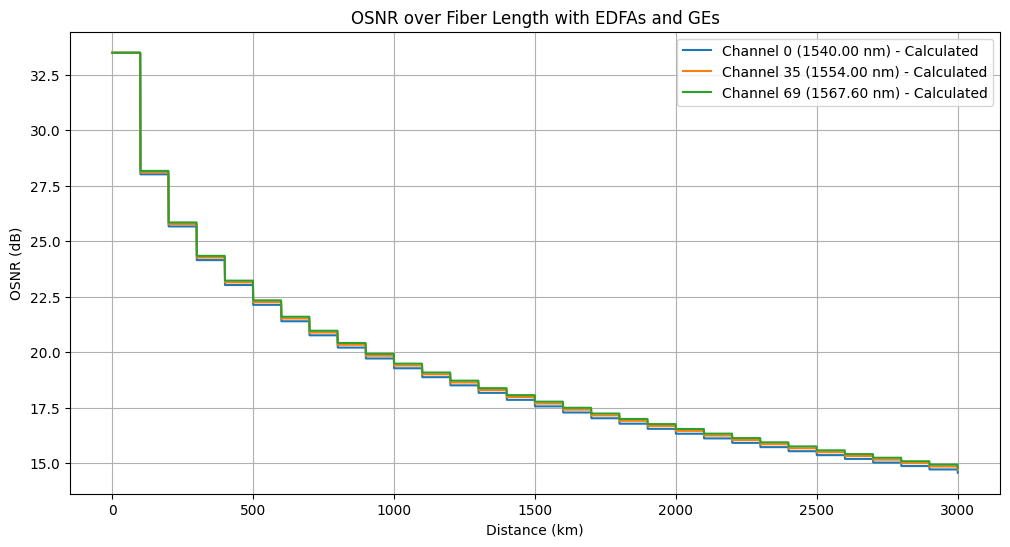

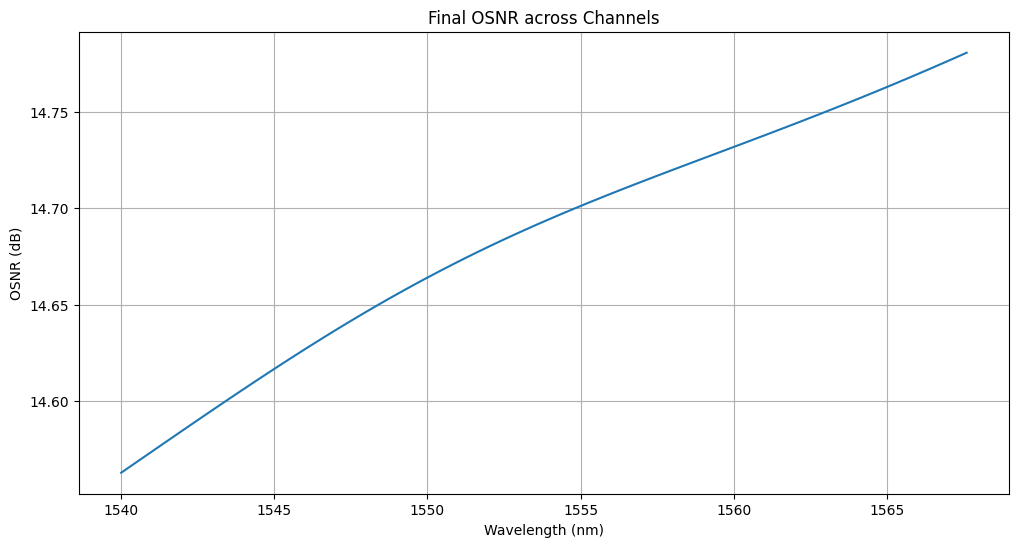

In [5]:
# Ensure noise power is not zero or negative before calculating the ratio
epsilon_power = 1e-18 # Small value to avoid division by zero or log of zero

multi_channel_OSNR_dB = 10 * np.log10((multi_channel_signal_power_mW + epsilon_power) / (multi_channel_noise_power_mW + epsilon_power))

# Plot OSNR for selected channels
plt.figure(figsize=(12, 6))

for idx, channel_index in enumerate(channels_to_plot):
    plt.plot(
        np.arange(length + 1),
        multi_channel_OSNR_dB[channel_index, :],
        label=f'Channel {channel_index} ({wavelengths_to_plot_nm[idx]:.2f} nm) - Calculated'
    )
initial_total_power_mW = 10**(target_total_initial_power_dBm / 10)
initial_power_per_channel_mW = 10**(channel_power / 10) # Use the pre-emphasized initial power
number_of_spans = np.arange(length + 1) // span
# Use the initial OSNR value from the instantiation


# Overlay the simple modeled OSNR


plt.title('OSNR over Fiber Length with EDFAs and GEs')
plt.xlabel('Distance (km)')
plt.ylabel('OSNR (dB)')


plt.grid(True)
plt.legend()
plt.show()

# Also plot the final OSNR across all channels at the end of the link
plt.figure(figsize=(12, 6))
plt.plot(channeled_lambdas_nm, multi_channel_OSNR_dB[:, -1])
plt.title('Final OSNR across Channels')
plt.xlabel('Wavelength (nm)')
plt.ylabel('OSNR (dB)')
plt.grid(True)
plt.show()

Calculated SNR values (dB) for the first few channels over distance:
Final SNR (dB) at the end of the link for selected channels:
Channel 0 (1540.00 nm): 8.54 dB
Channel 35 (1554.00 nm): 8.67 dB
Channel 69 (1567.60 nm): 8.76 dB


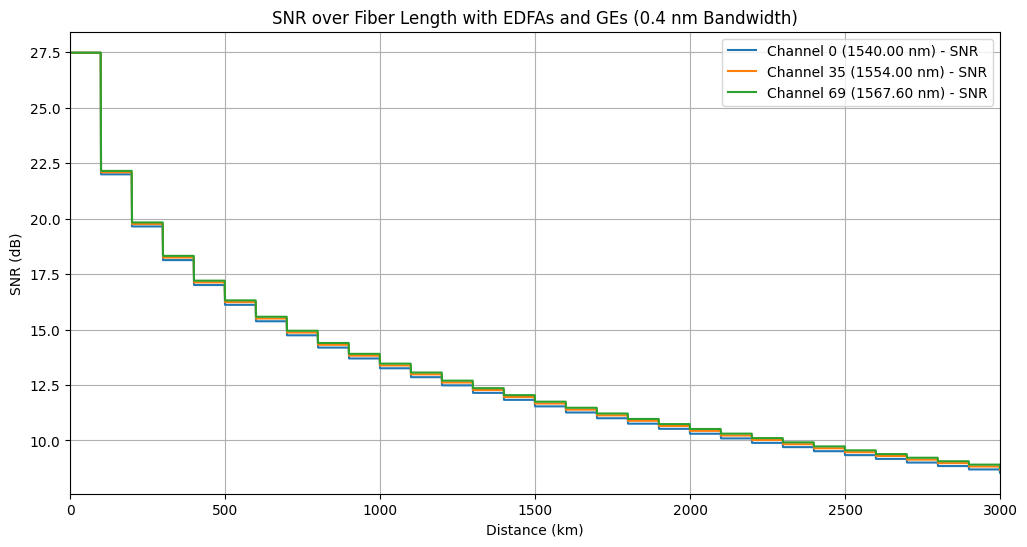

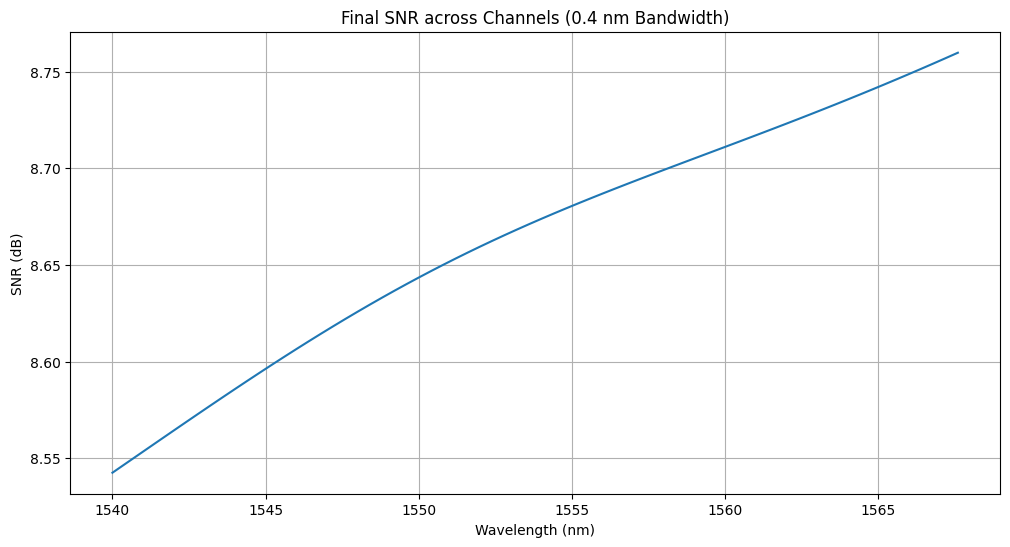

In [6]:
# Define the reference bandwidth (used for OSNR) and the desired SNR bandwidth
snr_bandwidth_nm = 0.4e-9
reference_bandwidth_nm = 0.1e-9

# Calculate the scaling factor in dB
# When converting from a narrower OSNR reference bandwidth to a wider SNR bandwidth,
# the noise power increases, so the SNR decreases. We should subtract the scaling factor.
bandwidth_scaling_dB = 10 * np.log10(snr_bandwidth_nm / reference_bandwidth_nm)

# Calculate SNR in dB for each channel over distance
# SNR (dB) = OSNR (dB) - 10 * log10(SNR Bandwidth / OSNR Reference Bandwidth)
multi_channel_SNR_dB = multi_channel_OSNR_dB - bandwidth_scaling_dB

# You can optionally display the first few SNR values or plot them
print("Calculated SNR values (dB) for the first few channels over distance:")
# Print SNR at the end of the link for the selected channels
print("Final SNR (dB) at the end of the link for selected channels:")
for channel_index in channels_to_plot:
    print(f"Channel {channel_index} ({wavelengths_to_plot_nm[channels_to_plot.index(channel_index)]:.2f} nm): {multi_channel_SNR_dB[channel_index, -1]:.2f} dB")


# Plot SNR for selected channels
plt.figure(figsize=(12, 6))

for idx, channel_index in enumerate(channels_to_plot):
    plt.plot(
        np.arange(length + 1),
        multi_channel_SNR_dB[channel_index, :],
        label=f'Channel {channel_index} ({wavelengths_to_plot_nm[idx]:.2f} nm) - SNR'
    )

plt.title('SNR over Fiber Length with EDFAs and GEs (0.4 nm Bandwidth)')
plt.xlabel('Distance (km)')
plt.ylabel('SNR (dB)')
plt.xlim(0,length) # Set x-axis limit to the total length
plt.grid(True)
plt.legend()
plt.show()

# Also plot the final SNR across all channels at the end of the link
plt.figure(figsize=(12, 6))
plt.plot(channeled_lambdas_nm, multi_channel_SNR_dB[:, -1])
plt.title('Final SNR across Channels (0.4 nm Bandwidth)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('SNR (dB)')
plt.grid(True)
plt.show()

##BER per channel

Note: Using a simplified BER model for RZ-OOK (same as NRZ-OOK). More accurate models exist.


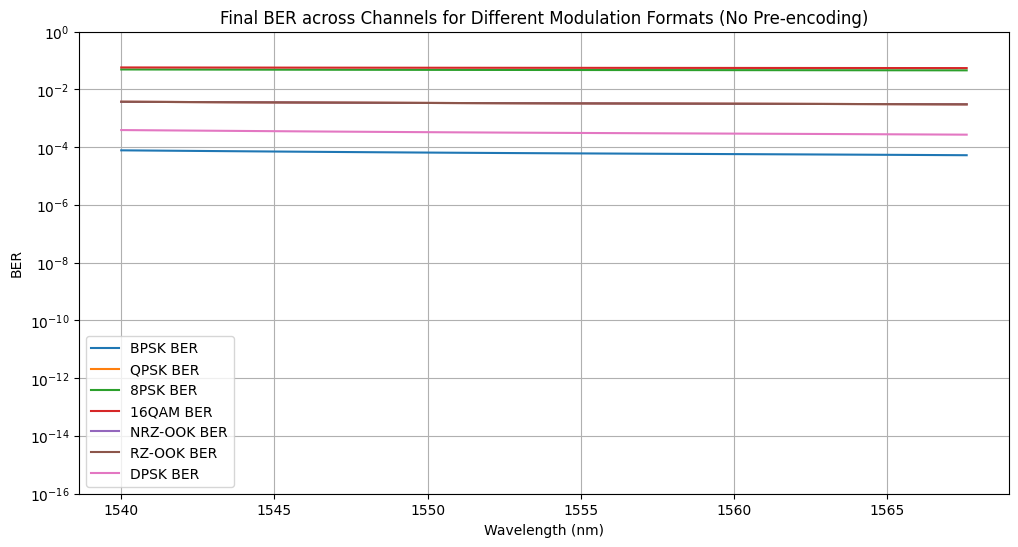

In [7]:
# prompt: replace the current graph in the BER cell with a graph of what the BER is for each possible modulation format

import matplotlib.pyplot as plt
import numpy as np
import scipy.special # Ensure sp.special is available

def calculate_ber(snr_db, modulation='QPSK', pre_encoding=None):
    """
    Calculates the Bit Error Rate (BER) based on SNR for different modulation
    and pre-encoding schemes.

    Args:
        snr_db (float or np.ndarray): Signal-to-Noise Ratio in dB.
        modulation (str): Modulation scheme ('BPSK', 'QPSK', '8PSK', '16QAM',
                          'NRZ-OOK', 'RZ-OOK', 'DPSK'). Defaults to 'QPSK'.
        pre_encoding (str): Pre-encoding scheme (e.g., 'None', 'FEC', 'Concatenated',
                            'Convolutional', 'Turbo'). Defaults to None.

    Returns:
        float or np.ndarray: Calculated BER.
    """
    snr_linear = 10**(snr_db / 10)
    # Ensure SNR linear is not zero or negative before calculating BER
    snr_linear = np.maximum(snr_linear, 1e-10) # Add a small floor to SNR linear


    # Calculate unencoded BER based on modulation
    if modulation.lower() == 'bpsk':
        # BER for BPSK: 0.5 * erfc(np.sqrt(snr_linear))
        unencoded_ber = 0.5 * scipy.special.erfc(np.sqrt(snr_linear))
    elif modulation.lower() == 'qpsk':
        # BER for QPSK: 0.5 * erfc(np.sqrt(snr_linear/2)) - assumes Gray coding
        unencoded_ber = 0.5 * scipy.special.erfc(np.sqrt(snr_linear / 2))
    elif modulation.lower() == '8psk':
        # Approximate BER for 8PSK (often uses minimum distance):
        # BER approx 1/3 * erfc(np.sin(np.pi/8) * np.sqrt(snr_linear))
        unencoded_ber = (1/3) * scipy.special.erfc(np.sin(np.pi/8) * np.sqrt(snr_linear))
    elif modulation.lower() == '16qam':
        # Approximate BER for 16QAM (using rectangle approximation with Gray coding):
        # BER approx 0.25 * erfc(np.sqrt(snr_linear/10))
        unencoded_ber = 0.25 * scipy.special.erfc(np.sqrt(snr_linear / 10))
    elif modulation.lower() == 'nrz-ook':
        # BER for NRZ-OOK (assuming direct detection and thermal noise dominant):
        # BER = 0.5 * erfc(sqrt(SNR_linear)/sqrt(2))
        unencoded_ber = 0.5 * scipy.special.erfc(np.sqrt(snr_linear / 2))
    elif modulation.lower() == 'rz-ook':
         # BER for RZ-OOK (assuming direct detection and thermal noise dominant):
         # The SNR definition for RZ can vary, but a common approach relates it to NRZ.
         # Assuming the average power is the same as NRZ, peak power is higher, but pulse width is shorter.
         # Often modeled with a slight penalty compared to NRZ or a different SNR definition.
         # For a simplified model, let's use the same formula as NRZ for now, but acknowledge it's an approximation.
         # A more accurate model might involve a penalty or a different Q-factor relationship.
        print("Note: Using a simplified BER model for RZ-OOK (same as NRZ-OOK). More accurate models exist.")
        unencoded_ber = 0.5 * scipy.special.erfc(np.sqrt(snr_linear / 2))
    elif modulation.lower() == 'dpsk':
        # BER for DPSK (assuming differential detection):
        # BER = 0.5 * exp(-SNR_linear)
        unencoded_ber = 0.5 * np.exp(-snr_linear)
    else:
        print(f"Warning: Modulation scheme '{modulation}' not recognized. Calculating BER as if BPSK.")
        unencoded_ber = 0.5 * scipy.special.erfc(np.sqrt(snr_linear))
    # Add more modulation schemes as needed

    ber = unencoded_ber.copy() # Start with unencoded BER


    # Apply pre-encoding if specified
    if pre_encoding is not None:
        if pre_encoding.lower() == 'fec':
            # Simplified FEC model: Reduce BER by a factor or use a threshold.
            # A more realistic model would involve a Q-factor penalty or
            # a look-up table for post-FEC BER based on pre-FEC BER.
            # For simplicity, let's apply a power penalty or a simple BER reduction.
            # A common approximation for hard-decision FEC threshold is around 1e-3 to 1e-4 pre-FEC BER.
            # Let's implement a simple reduction factor for demonstration.
            # This is a placeholder; a real FEC would be more complex.
            ber = unencoded_ber * 0.001 # Example: Reduce BER by a factor of 1000 (highly simplified)
            # Alternatively, define a threshold. If BER is below threshold, FEC corrects it to near zero.
            # fec_threshold = 1e-3 # Example threshold
            # ber[ber < fec_threshold] = 1e-15 # Set to a very low value after FEC

        elif pre_encoding.lower() in ['concatenated', 'convolutional', 'turbo']:
            # Model with a BER threshold and inverse scaling below threshold
            # Define parameters for each code type - These are example values and should be adjusted based on actual code performance
            if pre_encoding.lower() == 'concatenated':
                 ber_threshold = 1e-3
                 scaling_exponent = 1.5
                 base_scaling = 1e-4
                 print("Note: Using simplified threshold and inverse scaling for Concatenated Codes.")
            elif pre_encoding.lower() == 'convolutional':
                 ber_threshold = 5e-3 # Convolutional codes might have a slightly higher threshold
                 scaling_exponent = 1.2 # Less steep slope than Turbo/Concatenated
                 base_scaling = 5e-3 # Less aggressive reduction at the threshold
                 print("Note: Using simplified threshold and inverse scaling for Convolutional Codes.")
            elif pre_encoding.lower() == 'turbo':
                 ber_threshold = 8e-4 # Turbo codes often have a sharp cliff at a lower BER
                 scaling_exponent = 2.0 # Steeper slope
                 base_scaling = 1e-5 # More aggressive reduction at the threshold
                 print("Note: Using simplified threshold and inverse scaling for Turbo Codes.")
            else:
                 # Default parameters if a recognized code type is not matched (should not happen with the outer if)
                 ber_threshold = 1e-3
                 scaling_exponent = 1.5
                 base_scaling = 1e-4

            below_threshold_mask = unencoded_ber < ber_threshold
            scaling_factor = np.ones_like(unencoded_ber) # Default scaling is 1 (no change)

            # Apply inverse scaling only where below the threshold and unencoded_ber > 0
            effective_mask = np.logical_and(below_threshold_mask, unencoded_ber > 0)

            # Calculate scaling factor for effective points
            scaling_factor[effective_mask] = base_scaling * (ber_threshold / unencoded_ber[effective_mask])**scaling_exponent

            # Apply the scaling factor to the unencoded BER for points below the threshold
            ber[effective_mask] = unencoded_ber[effective_mask] * scaling_factor[effective_mask]

            ber_floor = 1e-15 # Example BER floor for very strong codes
            ber[effective_mask] = np.maximum(ber[effective_mask], ber_floor)


        else:
             print(f"Warning: Pre-encoding scheme '{pre_encoding}' not recognized. Calculating BER without pre-encoding.")
             ber = unencoded_ber.copy() # No pre-encoding applied


    # Ensure BER is within valid range [0, 1] and handle potential NaN/Inf
    ber = np.nan_to_num(ber, nan=1.0, posinf=1.0, neginf=0.0)
    ber = np.clip(ber, 0, 1)


    return ber

# Example usage with the calculated final SNR (multi_channel_SNR_dB[:, -1])
final_snr_db = multi_channel_SNR_dB[:, -1]

# Calculate BER for each modulation format (without pre-encoding)
ber_bpsk = calculate_ber(final_snr_db, modulation='BPSK', pre_encoding=None)
ber_qpsk = calculate_ber(final_snr_db, modulation='QPSK', pre_encoding=None)
ber_8psk = calculate_ber(final_snr_db, modulation='8PSK', pre_encoding=None)
ber_16qam = calculate_ber(final_snr_db, modulation='16QAM', pre_encoding=None)
ber_nrzoek = calculate_ber(final_snr_db, modulation='NRZ-OOK', pre_encoding=None)
ber_rzook = calculate_ber(final_snr_db, modulation='RZ-OOK', pre_encoding=None)
ber_dpsk = calculate_ber(final_snr_db, modulation='DPSK', pre_encoding=None)

# Plot the final BER across channels for each modulation format
plt.figure(figsize=(12, 6))
plt.semilogy(channeled_lambdas_nm, ber_bpsk, label='BPSK BER')
plt.semilogy(channeled_lambdas_nm, ber_qpsk, label='QPSK BER')
plt.semilogy(channeled_lambdas_nm, ber_8psk, label='8PSK BER')
plt.semilogy(channeled_lambdas_nm, ber_16qam, label='16QAM BER')
plt.semilogy(channeled_lambdas_nm, ber_nrzoek, label='NRZ-OOK BER')
plt.semilogy(channeled_lambdas_nm, ber_rzook, label='RZ-OOK BER')
plt.semilogy(channeled_lambdas_nm, ber_dpsk, label='DPSK BER')


plt.title('Final BER across Channels for Different Modulation Formats (No Pre-encoding)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('BER')
plt.grid(True, which="both")
plt.legend()
plt.ylim(1e-16, 1) # Adjust y-axis limits for BER to show lower values
plt.show()

Note: Using simplified threshold and inverse scaling for Concatenated Codes.
Note: Using simplified threshold and inverse scaling for Turbo Codes.
Note: Using simplified threshold and inverse scaling for Turbo Codes.
Note: Using simplified threshold and inverse scaling for Turbo Codes.
Note: Using simplified threshold and inverse scaling for Turbo Codes.
Note: Using a simplified BER model for RZ-OOK (same as NRZ-OOK). More accurate models exist.
Note: Using simplified threshold and inverse scaling for Turbo Codes.
Note: Using simplified threshold and inverse scaling for Turbo Codes.


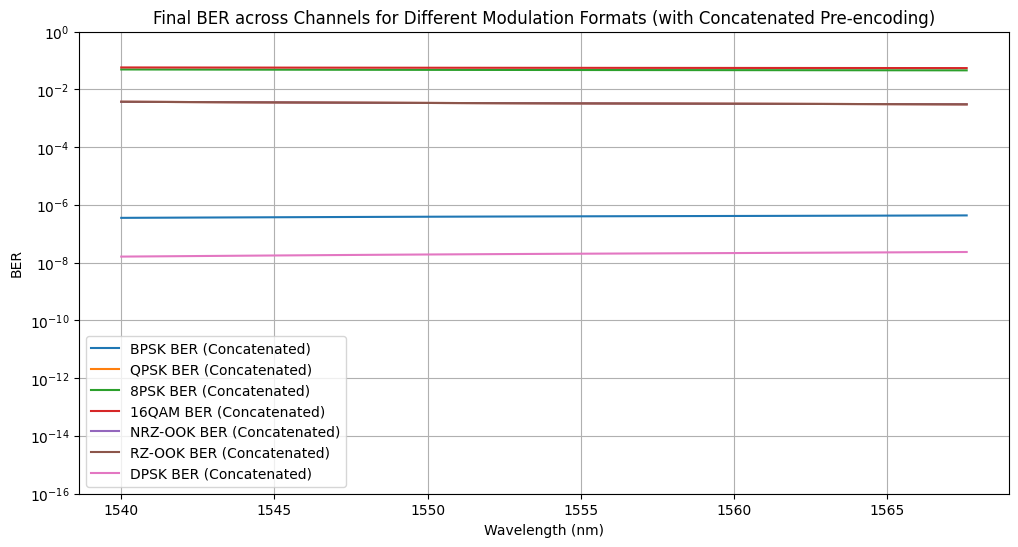

In [8]:
# Calculate BER for each modulation format with Concatenated pre-encoding
ber_bpsk_concat = calculate_ber(final_snr_db, modulation='BPSK', pre_encoding='Concatenated')
ber_qpsk_concat = calculate_ber(final_snr_db, modulation='QPSK', pre_encoding='turbo')
ber_8psk_concat = calculate_ber(final_snr_db, modulation='8PSK', pre_encoding='turbo')
ber_16qam_concat = calculate_ber(final_snr_db, modulation='16QAM', pre_encoding='turbo')
ber_nrzoek_concat = calculate_ber(final_snr_db, modulation='NRZ-OOK', pre_encoding='turbo')
ber_rzook_concat = calculate_ber(final_snr_db, modulation='RZ-OOK', pre_encoding='turbo')
ber_dpsk_concat = calculate_ber(final_snr_db, modulation='DPSK', pre_encoding='turbo')

# Plot the final BER across channels for each modulation format with Concatenated pre-encoding
plt.figure(figsize=(12, 6))
plt.semilogy(channeled_lambdas_nm, ber_bpsk_concat, label='BPSK BER (Concatenated)')
plt.semilogy(channeled_lambdas_nm, ber_qpsk_concat, label='QPSK BER (Concatenated)')
plt.semilogy(channeled_lambdas_nm, ber_8psk_concat, label='8PSK BER (Concatenated)')
plt.semilogy(channeled_lambdas_nm, ber_16qam_concat, label='16QAM BER (Concatenated)')
plt.semilogy(channeled_lambdas_nm, ber_nrzoek_concat, label='NRZ-OOK BER (Concatenated)')
plt.semilogy(channeled_lambdas_nm, ber_rzook_concat, label='RZ-OOK BER (Concatenated)')
plt.semilogy(channeled_lambdas_nm, ber_dpsk_concat, label='DPSK BER (Concatenated)')


plt.title('Final BER across Channels for Different Modulation Formats (with Concatenated Pre-encoding)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('BER')
plt.grid(True, which="both")
plt.legend()
plt.ylim(1e-16, 1) # Adjust y-axis limits for BER to show lower values
plt.show()